In [ ]:
# Note
# Grouping data based on similarities

# Key concepts
# - 



Satisfied + loyal
Not-satisfied + Loyal

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [5]:
# Load data

raw_data = pd.read_csv("3.01.+Country+clusters.csv")
data = raw_data.copy()
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English
6,Nigeria,9.08,8.68,English
7,Kenya,2.92,39.00,English


### Clustering based on Geo Location

In [24]:
X = data.iloc[:, 1:3]
X

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11
6,9.08,8.68
7,2.92,39.00


In [45]:
vincent = KMeans(n_clusters=4)
vincent.fit(X)

KMeans(n_clusters=4)

In [46]:
# identified_clusters
ic = vincent.fit_predict(X)
ic

array([2, 2, 0, 0, 0, 1, 3, 3], dtype=int32)

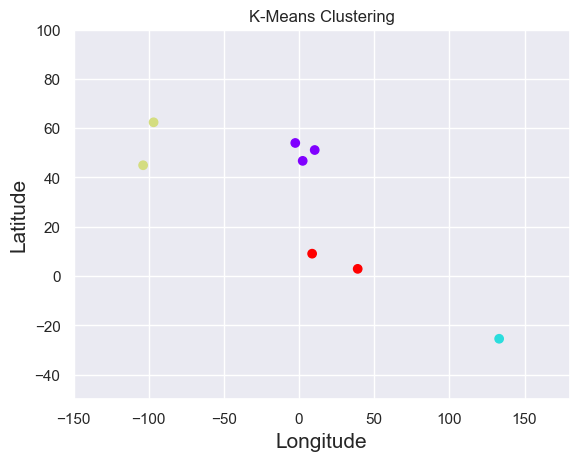

In [50]:
# Whenever you are plotting geographical location, 
# Longitude represents x-axis
# Latitude represents y-axis

x = X.iloc[:, 1]
y = X.iloc[:, 0]


plt.scatter(x, y, c=ic, cmap="rainbow")
plt.xlim(-150, 180)
plt.ylim(-50, 100)

plt.title("K-Means Clustering")
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)
plt.show()

### Clustering based on language

In [58]:
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


In [65]:
data = raw_data.copy()

data["Language"] = data["Language"].map({"English": 1, "French": 2, "German": 3})
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,1
1,Canada,62.40,-96.80,1
2,France,46.75,2.40,2
3,UK,54.01,-2.53,1
4,Germany,51.15,10.40,3
5,Australia,-25.45,133.11,1
6,Nigeria,9.08,8.68,1
7,Kenya,2.92,39.00,1


In [66]:
data_c = data.iloc[:, 1:4] 
data_c

,Latitude,Longitude,Language
0,44.97,-103.77,1
1,62.40,-96.80,1
2,46.75,2.40,2
3,54.01,-2.53,1
4,51.15,10.40,3
5,-25.45,133.11,1
6,9.08,8.68,1
7,2.92,39.00,1


In [102]:
kmeans = KMeans(n_clusters=3)
ic = kmeans.fit_predict(data_c)

# data_c["lang_c"] = c_data

array([2, 2, 0, 0, 0, 1, 0, 0], dtype=int32)

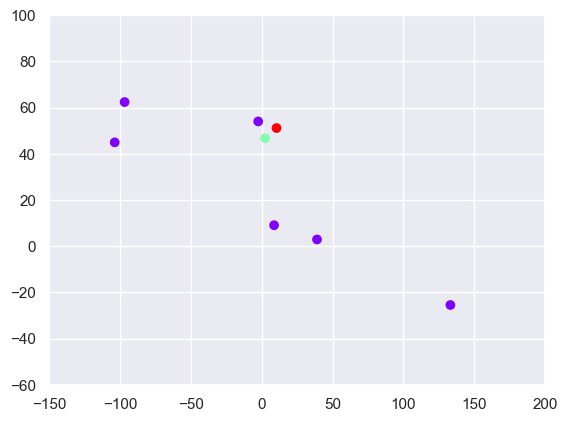

In [106]:
x = data["Longitude"]
y = data["Latitude"]

lang_c = data["Language"]
lang_c

# plt.scatter(x=data["Longitude"], y=data["Latitude"])
# plt.scatter(x=x, y=y, c=lang_c, cmap="rainbow")
plt.scatter(x, y, c=data["Language"], cmap="rainbow")

plt.xlim(-150, 200)
plt.ylim(-60, 100)
plt.show()